# Multiple Linear Regression with Churn Dataset

[Part I: Research Question](#research-question)<br>

[Part III: Data Preparation and Manipulation](#data-preparation)<br>

[Part IV: Constructing the Regression Model](#regression-model)<br>

 - [Checking for Multicollinearity with VIF](#vif)<br>
 
 - [Residual Standard Error(RSS)](#rss)

# Part I: Research Question<a name = "research-question"></a> 

### Can we predict the Tenure duration of our customers with the variables we have?

In [1]:
# Import libraries and packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
# Load the data
os.chdir('/Users/secil/Documents/WGU-MSDA/Data/churn_clean')
df_original = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns',100)
df_original.shape

(10000, 50)

### Choosing the variables

In [3]:
df_original.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

> **Predictor variables:** `'Email','Contract','InternetService','OnlineBackup',
'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharge',Bandwidth_GB_Year`

> **Target variable:** `'Tenure'` 

In [3]:
# # Create a new dataset with variables for analysis
df = df_original[['Email','Contract','InternetService','OnlineBackup','OnlineSecurity',
                  'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','Tenure','MonthlyCharge',
                  'Bandwidth_GB_Year']]

In [5]:
df.sample(3)

,Email,Contract,InternetService,OnlineBackup,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
3758,10,Month-to-month,Fiber Optic,Yes,No,Yes,Yes,No,No,9.231083,192.48850,1066.382948
6134,15,Month-to-month,None,No,Yes,Yes,No,No,No,49.282330,95.01949,4179.222967
7055,10,One year,Fiber Optic,Yes,Yes,Yes,No,No,Yes,54.445320,217.48400,4818.096570


# Part III: Data Preparation and Manipulation<a name="data-preparation"></a>

## a) Cleaning the Data

In [6]:
# Checking for duplicates
sum(df.duplicated())

0

In [7]:
# Checking for null values
df.isnull().sum()

Email                0
Contract             0
InternetService      0
OnlineBackup         0
OnlineSecurity       0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64

## b) Data Exploration with Visualizations and Summary Statistics

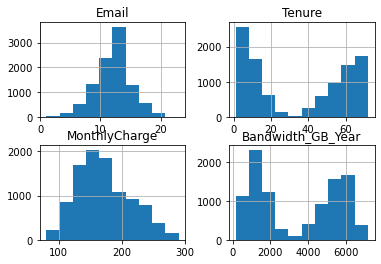

In [8]:
# Checking the distribution and outliers
df.hist();

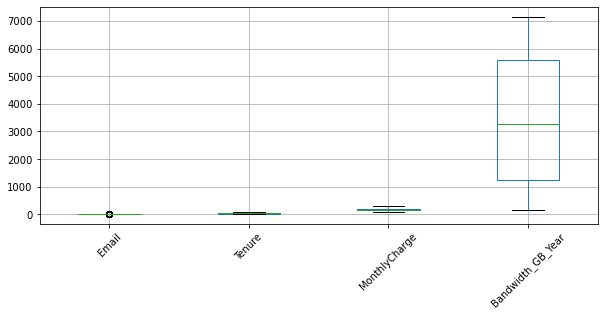

In [9]:
# Checking the distribution and outliers 
plt.figure(figsize=(10,4))
df.boxplot()
plt.xticks(rotation=45);

> There are no outliers.

### Visualizations of Numeric Variables

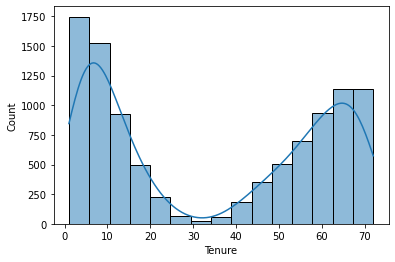

In [10]:
# Distribution of the dependent variable
sns.histplot(data=df, x='Tenure',kde=True);
plt.savefig('Tenure')

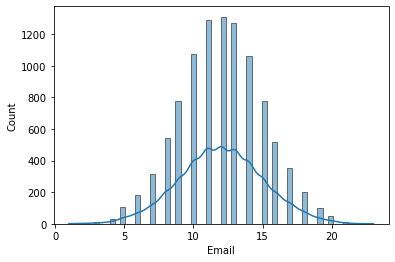

In [11]:
# Distribution of numeric independent variable
sns.histplot(data=df, x='Email',kde=True);
plt.savefig('Email')

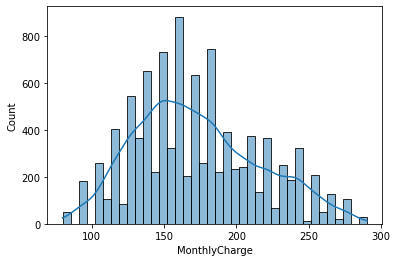

In [12]:
# Distribution of numeric independent variable
sns.histplot(data=df, x='MonthlyCharge',kde=True);
plt.savefig('MonthlyCharge')

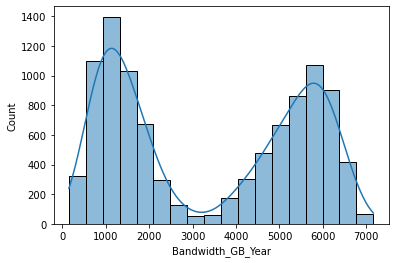

In [13]:
# Distribution of numeric independent variable
sns.histplot(data=df, x='Bandwidth_GB_Year',kde=True);
plt.savefig('Bandwidth')

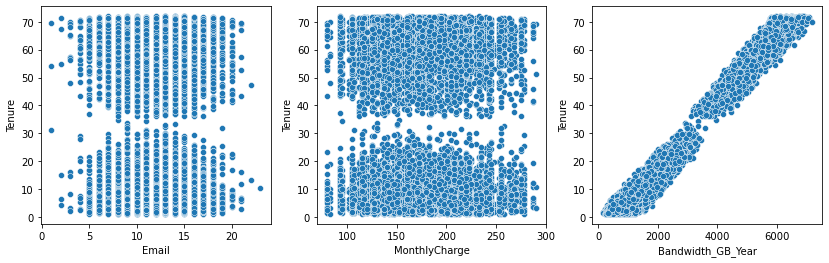

In [14]:
# Bivariate Plots of numeric variables

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Email', y='Tenure')
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='MonthlyCharge', y='Tenure')
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Bandwidth_GB_Year', y='Tenure');
plt.savefig('Tenure vs')

In [15]:
# Summary Statistics of the numeric dataset
df.describe()

,Email,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.016000,34.526188,172.624816,3392.341550
std,3.025898,26.443063,42.943094,2185.294852
min,1.000000,1.000259,79.978860,155.506715
25%,10.000000,7.917694,139.979239,1236.470827
50%,12.000000,35.430507,167.484700,3279.536903
75%,14.000000,61.479795,200.734725,5586.141370
max,23.000000,71.999280,290.160419,7158.981530


### Visualizations of Categorical Variables

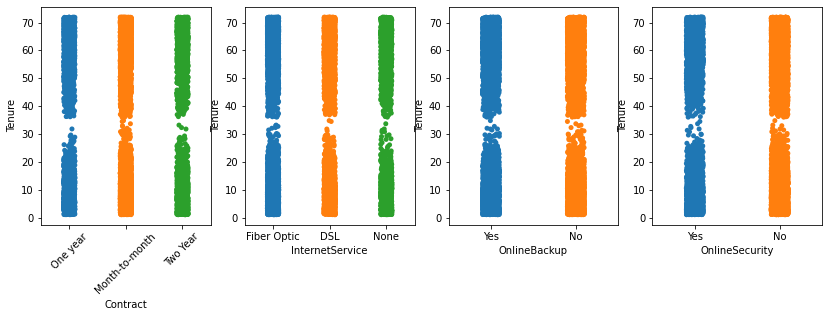

In [16]:
# Plot the categorical variables
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
sns.stripplot(data=df, x='Contract', y='Tenure')
plt.xticks(rotation=45)
plt.subplot(1,4,2)
sns.stripplot(data=df, x='InternetService', y='Tenure')
plt.subplot(1,4,3)
sns.stripplot(data=df, x='OnlineBackup', y='Tenure')
plt.subplot(1,4,4)
sns.stripplot(data=df, x='OnlineSecurity', y='Tenure');
plt.savefig('Tenure vs categ1')

In [17]:
# Summary statistics for categorical variables (ratio)

print((df.Contract.value_counts()/(len(df.Contract)))*100)
print('-'*30)
print((df.InternetService.value_counts()/(len(df.InternetService)))*100)
print('-'*30)
print((df.OnlineBackup.value_counts()/(len(df.OnlineBackup)))*100)
print('-'*30)
print((df.OnlineSecurity.value_counts()/(len(df.OnlineSecurity)))*100)

Month-to-month    54.56
Two Year          24.42
One year          21.02
Name: Contract, dtype: float64
------------------------------
Fiber Optic    44.08
DSL            34.63
None           21.29
Name: InternetService, dtype: float64
------------------------------
No     54.94
Yes    45.06
Name: OnlineBackup, dtype: float64
------------------------------
No     64.24
Yes    35.76
Name: OnlineSecurity, dtype: float64


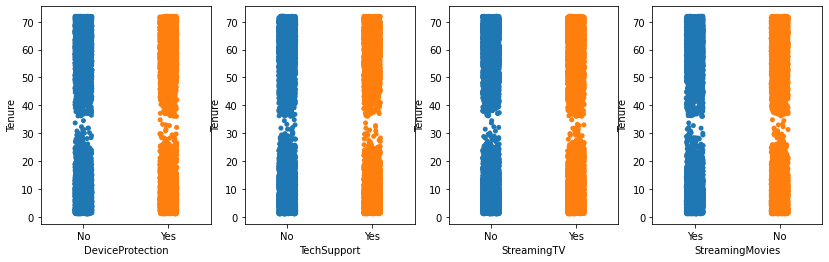

In [18]:
# Plot more categorical variables 
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
sns.stripplot(data=df, x='DeviceProtection', y='Tenure');
plt.subplot(1,4,2)
sns.stripplot(data=df, x='TechSupport', y='Tenure')
plt.subplot(1,4,3)
sns.stripplot(data=df, x='StreamingTV', y='Tenure')
plt.subplot(1,4,4)
sns.stripplot(data=df, x='StreamingMovies', y='Tenure');
plt.savefig('Tenure vs categ2')

In [19]:
# Summary statistics for categorical variables (ratio)

print((df.DeviceProtection.value_counts()/(len(df.DeviceProtection)))*100)
print('-'*30)
print((df.TechSupport.value_counts()/(len(df.TechSupport)))*100)
print('-'*30)
print((df.StreamingTV.value_counts()/(len(df.StreamingTV)))*100)
print('-'*30)
print((df.StreamingMovies.value_counts()/(len(df.StreamingMovies)))*100)

No     56.14
Yes    43.86
Name: DeviceProtection, dtype: float64
------------------------------
No     62.5
Yes    37.5
Name: TechSupport, dtype: float64
------------------------------
No     50.71
Yes    49.29
Name: StreamingTV, dtype: float64
------------------------------
No     51.1
Yes    48.9
Name: StreamingMovies, dtype: float64


## c) Data Wrangling
#### Re-expression of Categorical Variables

In [20]:
df.nunique()

Email                   23
Contract                 3
InternetService          3
OnlineBackup             2
OnlineSecurity           2
DeviceProtection         2
TechSupport              2
StreamingTV              2
StreamingMovies          2
Tenure                9996
MonthlyCharge          750
Bandwidth_GB_Year    10000
dtype: int64

In [21]:
df.InternetService.unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [22]:
df.Contract.unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [23]:
df.OnlineBackup.unique(),df.OnlineSecurity.unique(),df.DeviceProtection.unique()

(array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [24]:
df.StreamingMovies.unique(),df.StreamingTV.unique(), df.TechSupport.unique()

(array(['Yes', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [4]:
# Creating dummy variables for nomial variable with more than two values

df = pd.get_dummies(df, columns=['InternetService','Contract'],drop_first=True)

In [5]:
# Label encoding yes/no variables with replace

df['OnlineSecurity'].replace(['No','Yes'],[0,1],inplace=True)
df['OnlineBackup'].replace(['No','Yes'],[0,1],inplace=True)
df['DeviceProtection'].replace(['No','Yes'],[0,1],inplace=True)
df['TechSupport'].replace(['No','Yes'],[0,1],inplace=True)
df['StreamingTV'].replace(['No','Yes'],[0,1],inplace=True)
df['StreamingMovies'].replace(['No','Yes'],[0,1],inplace=True)

In [27]:
# Save cleaned dataset
df.to_excel('cleaned_data.xlsx',index=False)

# Part IV: Construction of the Regression Model<a name="regression-model"></a>

### Check for Multicollinearity With Heatmap 

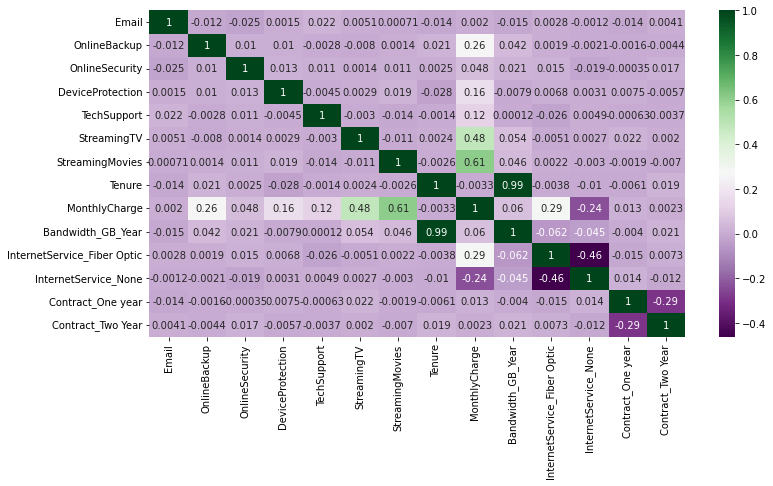

In [28]:
# Find the correlation using visualization
corr = df.corr()

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='PRGn');

>  The heat map shows some multicollinearity between `MonthlyCharge` and `InternetService_None`,`StreamingTV`, `StreamingMovies`, and `OnlineBackup`, but I will run my model first and then address multicollinearity on my final model.

## Understanding the Relationship of Variables using Statsmodels OLS Regression Model

### Initial Model

In [6]:
# Define x and y, add a constant to x to differentiate y at x=0
x = df.drop('Tenure',axis=1)
y = df[['Tenure']]
x = sm.add_constant(x)

In [7]:
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.463e+05
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:51:39   Log-Likelihood:                -16372.
No. Observations:               10000   AIC:                         3.277e+04
Df Residuals:                    9986   BIC:                         3.287e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.3670      0.093    -36.332      0.000      -3.549      -3.185
Email                          -0.0032      0.004     -0.780      0.435      -0.011       0.005
OnlineBackup                   -0.5026      0.029    -17.172      0.000      -0.560      -0.445
OnlineSecurity                 -0.8944      0.026    -34.324      0.000      -0.945      -0.843
DeviceProtection               -0.6900      0.027    -26.036      0.000      -0.742      -0.638
TechSupport                     0.3320      0.027     12.286      0.000       0.279       0.385
StreamingTV                    -1.6024      0.038    -42.318      0.000      -1.677      -1.528
StreamingMovies                -1.1007      0.043    -25.434      0.000      -1.185      -1.016
MonthlyCharge                  -0.0279      0.001    -41.336      0.000      -0.029      -0.027
Bandwidth_GB_Year               0.0122   5.75e-06   2119.513      0.000       0.012       0.012
InternetService_Fiber Optic     5.6171      0.031    178.955      0.000       5.556       5.679
InternetService_None            4.6891      0.036    131.556      0.000       4.619       4.759
Contract_One year              -0.0431      0.032     -1.347      0.178      -0.106       0.020
Contract_Two Year              -0.0686      0.030     -2.262      0.024      -0.128      -0.009
==============================================================================
Omnibus:                      376.449   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.808
Skew:                          -0.478   Prob(JB):                     1.54e-92
Kurtosis:                       3.317   Cond. No.                     3.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
np.exp(model1.params)

const                            0.034493
Email                            0.996794
OnlineBackup                     0.604938
OnlineSecurity                   0.408851
DeviceProtection                 0.501564
TechSupport                      1.393736
StreamingTV                      0.201422
StreamingMovies                  0.332648
MonthlyCharge                    0.972516
Bandwidth_GB_Year                1.012263
InternetService_Fiber Optic    275.081980
InternetService_None           108.758064
Contract_One year                0.957846
Contract_Two Year                0.933712
dtype: float64

In [31]:
# Residual standard error of the models
RSS = model1.resid.std(ddof=x.shape[1])
print('RSS is: ', RSS)

RSS is:  1.2448236319661343


### Model Selection using Backward Stepwise Regression 

> Because some of the p-values of these features are above significance level of 0.05, I will drop these one by one and reevalute the model.

In [32]:
# Model 2
x = x.drop('Email',axis=1)
model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.752e+05
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:58:38   Log-Likelihood:                -16373.
No. Observations:               10000   AIC:                         3.277e+04
Df Residuals:                    9987   BIC:                         3.286e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4060      0.078    -43.651      0.000      -3.559      -3.253
OnlineBackup                   -0.5024      0.029    -17.167      0.000      -0.560      -0.445
OnlineSecurity                 -0.8939      0.026    -34.315      0.000      -0.945      -0.843
DeviceProtection               -0.6901      0.027    -26.039      0.000      -0.742      -0.638
TechSupport                     0.3315      0.027     12.272      0.000       0.279       0.384
StreamingTV                    -1.6025      0.038    -42.324      0.000      -1.677      -1.528
StreamingMovies                -1.1008      0.043    -25.437      0.000      -1.186      -1.016
MonthlyCharge                  -0.0279      0.001    -41.335      0.000      -0.029      -0.027
Bandwidth_GB_Year               0.0122   5.75e-06   2119.769      0.000       0.012       0.012
InternetService_Fiber Optic     5.6170      0.031    178.957      0.000       5.555       5.679
InternetService_None            4.6892      0.036    131.560      0.000       4.619       4.759
Contract_One year              -0.0427      0.032     -1.337      0.181      -0.105       0.020
Contract_Two Year              -0.0686      0.030     -2.262      0.024      -0.128      -0.009
==============================================================================
Omnibus:                      376.904   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.386
Skew:                          -0.478   Prob(JB):                     1.16e-92
Kurtosis:                       3.317   Cond. No.                     2.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Residual standard error of model 2
RSS = model2.resid.std(ddof=x.shape[1])
print('RSS is: ', RSS)

RSS is:  1.2447992235417038


In [34]:
# Model 3 - Final Model
x = x.drop('Contract_One year',axis=1)
df = x

model3 = sm.OLS(y,x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.093e+05
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:58:58   Log-Likelihood:                -16374.
No. Observations:               10000   AIC:                         3.277e+04
Df Residuals:                    9988   BIC:                         3.286e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.4156      0.078    -43.961      0.000      -3.568      -3.263
OnlineBackup                   -0.5019      0.029    -17.149      0.000      -0.559      -0.445
OnlineSecurity                 -0.8940      0.026    -34.319      0.000      -0.945      -0.843
DeviceProtection               -0.6900      0.027    -26.036      0.000      -0.742      -0.638
TechSupport                     0.3318      0.027     12.283      0.000       0.279       0.385
StreamingTV                    -1.6025      0.038    -42.321      0.000      -1.677      -1.528
StreamingMovies                -1.0996      0.043    -25.415      0.000      -1.184      -1.015
MonthlyCharge                  -0.0279      0.001    -41.371      0.000      -0.029      -0.027
Bandwidth_GB_Year               0.0122   5.75e-06   2119.685      0.000       0.012       0.012
InternetService_Fiber Optic     5.6177      0.031    178.999      0.000       5.556       5.679
InternetService_None            4.6886      0.036    131.548      0.000       4.619       4.759
Contract_Two Year              -0.0567      0.029     -1.956      0.050      -0.114       0.000
==============================================================================
Omnibus:                      378.415   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.345
Skew:                          -0.479   Prob(JB):                     4.34e-93
Kurtosis:                       3.319   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Residual standard error of the final model
RSS = model3.resid.std(ddof=x.shape[1])
print('RSS is: ', round(RSS,4))

RSS is:  1.2448


### Multicollinearity Elimination with VIF<a name="vif"></a>

In [36]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif

,Features,VIF
0,const,38.955602
1,OnlineBackup,1.368421
2,OnlineSecurity,1.006010
3,DeviceProtection,1.116104
4,TechSupport,1.103769
5,StreamingTV,2.312573
6,StreamingMovies,3.018731
7,MonthlyCharge,5.406451
8,Bandwidth_GB_Year,1.018792
9,InternetService_Fiber Optic,1.566737


> There is no multicollinearity among the remaining predictors

## Residual Standard Error (RSE)<a name="rss"></a>

In [37]:
# Residual standard error of the final model
RSE = model3.resid.std(ddof=x.shape[1])
RSE

1.244848282337975

In [38]:
# Save Residuals and Predictions to variables
residuals = model3.resid
predictions = model3.fittedvalues

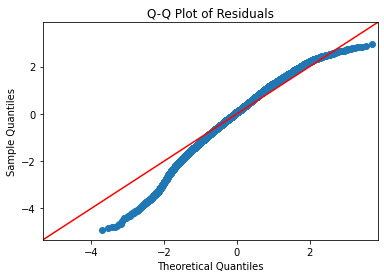

In [39]:
# Q-Q Plot of the Residuals to check for normality
sm.qqplot(data=residuals, line='45')
plt.title("Normal Q-Q plot")
plt.title('Q-Q Plot of Residuals');
plt.savefig('Q-QPlot')

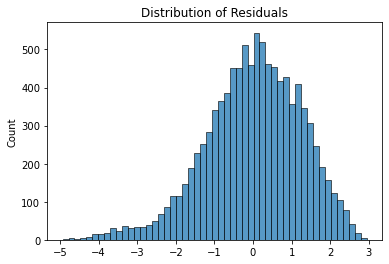

In [40]:
# Plot the distribution of the Residuals
sns.histplot(residuals)
plt.title('Distribution of Residuals');
plt.savefig('Res_hist')

In [41]:
# Std, Sum and mean of the Residuals
round(residuals.std(),4), residuals.sum(), residuals.mean()

(1.2442, -4.4984460600971943e-10, -4.4841641511084164e-14)

> I like looking at data in a tabular form, so I created a dataframe for the predicted values and residuals below

In [42]:
# Create a dataframe for residuals and predicted values
df_model = pd.DataFrame()
df_model['Predictions'] = model3.fittedvalues # predicted values same as model3.predict()
df_model['Residuals'] = model3.resid
df_model['Target'] = y['Tenure']
df_model.head()

,Predictions,Residuals,Target
0,5.922015,0.873498,6.795513
1,1.602298,-0.445617,1.156681
2,16.010941,-0.256797,15.754144
3,17.068405,0.018822,17.087227
4,0.058888,1.612083,1.670972


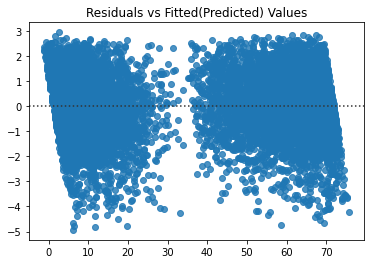

In [43]:
# Check if residuals are randomly scattered around 0
sns.residplot(y=residuals, x=predictions)
plt.title('Residuals vs Fitted(Predicted) Values');
plt.savefig('Residuals vs Predicted')

> It does look like the errors are randomly scatter around 0 without a pattern. I will also use Breusch-Pagan test to validate my understanding.

### Test for Heteroscedasticity

>**Ho:** The error variances are equal<br>
**Ha:** The error variances are not equal

In [44]:
# Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model3.resid, x)

tests = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(tests,bp_test)))

{'LM Statistic': 27.1495909056374, 'LM-Test p-value': 0.004362017968913033, 'F-Statistic': 2.4718939451692217, 'F-Test p-value': 0.00433695848530749}


> #### The F-test p-value is below 0.05, I reject the null and state the variances of the Residuals are not equal. The residuals are scattered randomly so they are considered homoscedastic.